#MASK-RCNN
This Notebook will be a comprehensive guide to Mask-RCNN. To begin I will walk you through each generation within the RCNN family to help you just understand how we got to where we are and to hopefully show just how much progress was made between only 2014-2017.


#HISTORY

**RCNN**

  Mask-RCNN is the 4th generation in the RCNN family. The orginal was the RCNN model which was originaly created in 2014 and was publish in a paper by Ross Girshick, Jeff Donahue, Trevor Darrell, and Jitendra Malik. The model proposed was a signifact milestone in computer vision. The model it self was a 3 step process. First the image is proccessed by a selective search algorithm in which 2,000-3,000 regions are generated and proposed by the algorithm in which these regions are possible areas in which an object of interest may be contained. Next these regions indiviually are passed through a CNN. Note how I said individually, ultimately this was a huge bottle neck that although the model had good performance, its training time was quite high due to the method of proccessing the regions. After passing through the CNN the regions are then passed to a classification head to classify the regions. As a visual representation of the proccess I included an image below to show this.

![RCNN model](https://lh6.googleusercontent.com/L-hLr-fL1mBUzKYMtNOeQZgF0CCw1rmE4230m90o-PctazAed_18_3G9f_FI7Qgo-Z5o3Lf_ZuDwC-YcwpyXpasCAq8xkRB2yHxMucN-sSal7SYsPCiWn558XuRUD2F5xP41h5Stb1Q2xmvHVaSH1LQ)
Image source: https://blog.roboflow.com/what-is-r-cnn/

---




LINK TO ORIGINAL PAPER: https://arxiv.org/abs/1311.2524v5


**FAST-RCNN**

Like I said before the way in which the regions were being passed to the CNN layers were a huge bottle neck when it came to the performance of the model. Fast-RCNN sought to improve upon the original model by introducing some new key features. First, instead of passing the region proposals individually into the CNN, the regions are all passed at once along with the original image to the CNN. Once the feature map for each of these region proposals are generated they go through what call teh ROI(Region of Interest) pooling layers. This is because the regions that are generated are varied in both size and aspect ratios. The ROI pooling layers convert the feature maps for this regions into fized vector sizes which are required the the two "heads" of this new model. These "heads" are the softmax and bounding box regressor(bbox regressor). The softmax head is where the classifaction is done for the regions and the bbox regressor helps refine the bounding boxes to the proposed regions. To help visualize the proccess an image is included below along with a link to the original paper and as well a link to a geeksforgeeks article that gives a good indepth explanation to the model.

![FastRCNN](https://media.geeksforgeeks.org/wp-content/uploads/20200219160147/fast-RCNN1-1024x416.png)
Image Source: https://www.geeksforgeeks.org/fast-r-cnn-ml/


---


geeksforgeeks article: https://www.geeksforgeeks.org/fast-r-cnn-ml/

Original Paper:https://arxiv.org/abs/1504.08083

**Faster-RCNN/Mask-RCNN**

I have combined both Faster-RCNN and Mask because essentially these two models are very similar in their archetecture. The main difference really is only that the Mask-RCNN included a segmentation head to allow for pixel wise instance segmentation while the Faster-RCNN is only for bounding boxes.

I'll start with Faster-RCNN since it came out before Mask-RCNN. This model drastically improved its predecessors archetecture by eliminating the need for the selective search algoritm. It did this by introducing the Region Proposal Network(RPN). The RPN is a neural network block in the model that uses the sliding window technique to produce region proposals. Because of this we not only gain performance by being able to utilize the performance benefits of neural networks but also gain the benefit of being able to train the generation of region proposals. The proccess and path the image goes through changed a bit. In this model the image goes through the CNN part of the model first. This is so that we can pass the feature map of the whole image to the RPN layer so that the region proposals are based off of the feature map itself. Once the feature map is created and is passed through the RPN layer those regions proposals like before go through the ROI layers and then to both the classification head and bbox regressor.

Mask R-CNN follows a similar process as Faster R-CNN in the early stages, sharing the backbone network and the Region Proposal Network (RPN) to generate regions of interest (RoIs). The key difference arises when it comes to processing these RoIs for pixel-wise tasks like mask prediction.

In Faster R-CNN, the RoIPool layer is used to extract fixed-size feature maps from the RoIs. However, because RoIPool rounds the floating-point coordinates of RoIs to integer values, it introduces a small misalignment between the feature map and the original image, which can affect the accuracy, especially for mask prediction.

To address this, Mask R-CNN introduces the RoIAlign layer. RoIAlign divides each RoI into fixed-sized regions (e.g., 7x7 or 14x14) but keeps the original floating-point coordinates. Instead of rounding, it uses bilinear interpolation to sample precise feature values from the feature map. This alignment improves the accuracy of mask predictions by preserving the spatial information, particularly for smaller objects or objects with finer details.

Once RoIAlign has produced fixed-size feature maps, these are passed to three different heads:

Classification head: Determines the class label of the object in the RoI.
Bounding box regressor head: Refines the bounding box for better localization.
Mask head: Generates a pixel-wise mask for the object, using the aligned feature map to produce an accurate segmentation.

Faster-RCNN

---


![FasterRCNN](https://media.geeksforgeeks.org/wp-content/uploads/20230823154315/Region-Proposal-Network-RPN-2.png)
Image Source: https://www.geeksforgeeks.org/mask-r-cnn-ml/

Original Paper: https://arxiv.org/abs/1506.01497


Mask-RCNN

---
![Maskrcnn](https://www.researchgate.net/publication/347267552/figure/fig1/AS:1001496221081601@1615786714108/The-Structure-diagram-of-Mask-RCNN-algorithm.png)

Image source: https://www.researchgate.net/figure/The-Structure-diagram-of-Mask-RCNN-algorithm_fig1_347267552

Original Paper: https://arxiv.org/abs/1703.06870





# IMPLEMENTATION

For this implementation we will be using the Mask-RCNN model provided by pytorch. As of to my knowledge there are two other popular ways to implement to use the Mask-RCNN. One is by using a tensor flow implementation made by Matter Port but this one uses old deprecated libraries which means that implemenating it using colab can be very tricky as one has to roll back the python version to one that isnt supported. Another is by using Metas Detectron2. This one works out of the box and the only downside is that its limited to COCO style annotations.

*DATA*

Within computer vision it is well know that data preperation can be a huge work load and often actually be where you spend most of your time. One good thing about Mask-RCNN is that you arent nececarily limited to one format. This is because when reading our dataset for our model we use a dataset class. This is for reading our dataset and being able to apply transformations to it and also to properly format the data into how the Mask-RCNN expects it to be. Although this means technically you can have your data in whatever format you want it parsing and extracting the necesarry data can be tricky depending on what your using. Ideally you would have a COCO dataset allowing you to use COCO tools which can do most of the work for you. Except if this is not possible, then there will be a need for much more manual work to be able to format it properly.For the following demonstration we will be using COCO formatted datasets.

First lets download a couple datasets the first is a microcontroller dataset and the ladder is a Trash dataset from roboflow.

MICRO-CONTROLLER DATASET SOURCE: https://www.kaggle.com/datasets/sovitrath/microcontroller-instance-segmentation-json-format

TRASH DATASET SOURCE: https://universe.roboflow.com/mohamed-traore-2ekkp/taco-trash-annotations-in-context/dataset/12#

NOTE ( To view the Trash dataset you may need a roboflow acount)

In [ ]:

# This dataset seperates the images and their associated annotations into differnt folders
!kaggle datasets download -d sovitrath/microcontroller-instance-segmentation-json-format
!unzip -qq microcontroller-instance-segmentation-json-format.zip

Dataset URL: https://www.kaggle.com/datasets/sovitrath/microcontroller-instance-segmentation-json-format
License(s): CC0-1.0
 90% 15.0M/16.7M [00:01<00:00, 17.2MB/s]
100% 16.7M/16.7M [00:01<00:00, 9.53MB/s]


**DATASET CUSTOM CLASS**

Our dataset class must have three important things to it and thats because we are using the torch.utils.data.Dataset as our parent and overriding three functions. Without inheriting from that base class our custom dataset class wont work with the DataLoader from pytorch and there for not work with our model. The three mandatory function we must overide are
1. **__init__:** This upon creating of a dataset object will load the images,annotations, and our transformation class that we pass to the object.

2. **__getitem__:** This is whats used to retrieve an image with its annotations. In here we will proccess the raw annotations and apply anytransformations if neccessary. we will also load our annotations into a dictionary called target. We will as well convert all our data into tensors. Note that here specifically we are using tv_tensors. This there are other options for tensors but tv_tensors is whats compatibale witht he transformation function we are using. Ensuring we use the correct tensor allows us to use transformation functions for preproccessing of the data which takes away the need to manually apply them and makes life much easier. You could also create your own if you would like and experiment.

3. **__len__**: This just returns the length of the dataset.

In [ ]:

import os
import torch
from PIL import Image
from pycocotools.coco import COCO
import torchvision.transforms as T
from torchvision.io import read_image
from torchvision import tv_tensors
from torchvision.transforms.v2 import functional as F

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np



import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor
import json




from shapely.geometry import Polygon
from shapely.geometry import box as shapely_box
from shapely import speedups
from PIL import ImageDraw

# Enable Shapely speedups if available
if speedups.available:
    speedups.enable()






<ipython-input-2-ce944193497f>:31: DeprecationWarning: This function has no longer any effect, and will be removed in a future release. Starting with Shapely 2.0, equivalent speedups are always available
  speedups.enable()


In [ ]:


class CocoDataset(torch.utils.data.Dataset):
    def __init__(self, ann_file, imgs_dir, transforms=None):
        """
        Args:
            ann_file (str): Path to the COCO annotations file (annotation.json).
            imgs_dir (str): Directory where the images are stored.
            transforms (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.imgs_dir = imgs_dir
        self.coco = COCO(ann_file)  # Load COCO annotations from the given file
        self.img_ids = self.coco.getImgIds()  # Get all image IDs
        self.transforms = transforms

    def __getitem__(self, idx):
        # Get image ID and corresponding annotations
        img_id = self.img_ids[idx]
        img_obj = self.coco.loadImgs(img_id)[0]
        anns_obj = self.coco.loadAnns(self.coco.getAnnIds(imgIds=img_id))

        # Load the image
        img = read_image(os.path.join(self.imgs_dir, img_obj['file_name']))
        # img = img.float() / 255.0  # Normalize to [0, 1]
        # img = Image.open(os.path.join(self.imgs_dir, img_obj['file_name'])).convert("RGB")

        # Load bounding boxes, convert from [x, y, w, h] to [x_min, y_min, x_max, y_max]
        bboxes = []
        for ann in anns_obj:
            x_min = ann['bbox'][0]
            y_min = ann['bbox'][1]
            x_max = x_min + ann['bbox'][2]  # x_min + width
            y_max = y_min + ann['bbox'][3]  # y_min + height
            bboxes.append([x_min, y_min, x_max, y_max])

        # Load masks
        masks = [self.coco.annToMask(ann) for ann in anns_obj]

        # Get area and crowd annotations
        areas = [ann['area'] for ann in anns_obj]
        iscrowd = [ann.get('iscrowd', 0) for ann in anns_obj]

        # Get labels (use category_id from annotations)
        labels = [ann['category_id'] for ann in anns_obj]

        # Convert everything to tensors
        boxes = tv_tensors.BoundingBoxes(bboxes, format="XYXY", canvas_size=F.get_size(img))
        labels = torch.as_tensor(labels, dtype=torch.int64)
        masks = tv_tensors.Mask(masks)
        image_id = idx
        area = torch.as_tensor(areas, dtype=torch.float32)
        iscrowd = torch.as_tensor(iscrowd, dtype=torch.int64)

        img = tv_tensors.Image(img)

        # Prepare the target dictionary
        target = {
            "boxes": boxes,
            "labels": labels,
            "masks": masks,
            "image_id": image_id,
            "area": area,
            "iscrowd": iscrowd
        }

        # Apply transforms
        if self.transforms is not None:
            img, target = self.transforms(img, target)

        return img, target

    def __len__(self):
        return len(self.img_ids)


As a nice to have Ive included a data class for reading in a Yolov11 formatted dataset as this is another common one. The key differences are one, that we cant use coco tools for loading the annotations, two, the format for this type of dataset doesnt store both bounding boxes and polygons, it only stores polygons therefore we must calculate the bounding box from the polygon which is simple we just have to find the ymax,ymin,xmax, and xmin values. Also in for this class I chose to manually assign the classes when deffining them in the class but one could also come up with a way to both input and read the yaml file that comes with the dataset to make things more streamlined.

In [ ]:


class YoloDataset(torch.utils.data.Dataset):
    def __init__(self, imgs_dir, anns_dir, transforms=None):
        """
        Args:
            imgs_dir (str): Directory where the images are stored.
            anns_dir (str): Directory where the YOLO annotation files are stored.
            transforms (callable, optional): Optional transform to be applied on a sample.
        """
        self.imgs_dir = imgs_dir
        self.anns_dir = anns_dir
        self.transforms = transforms
        self.classes = []# Change this to include the classes that you have for your dataset

        # Get all image files
        self.img_files = [file_name for file_name in os.listdir(imgs_dir)
                          if file_name.lower().endswith(('.png', '.jpg', '.jpeg'))]
        self.img_files.sort()

    def __getitem__(self, idx):
        # Get image file name and corresponding annotation file
        img_file = self.img_files[idx]
        img_path = os.path.join(self.imgs_dir, img_file)
        ann_path = os.path.join(self.anns_dir, os.path.splitext(img_file)[0] + '.txt')

        # Load the image
        img = read_image(img_path)
        img = tv_tensors.Image(img)

        # Get image dimensions
        img_height, img_width = F.get_size(img)  # returns (H, W)

        # Initialize lists for boxes, labels, masks
        boxes = []
        labels = []
        masks = []

        # Check if annotation file exists
        if os.path.exists(ann_path):
            with open(ann_path, 'r') as f:
                for line in f:
                    parts = line.strip().split()
                    if len(parts) < 5:
                        continue  # Skip invalid lines

                    class_id = int(parts[0])

                    if len(parts) == 5:
                        # Standard YOLO format: class_id x_center y_center width height
                        x_center = float(parts[1])
                        y_center = float(parts[2])
                        width = float(parts[3])
                        height = float(parts[4])

                        # Convert from normalized coordinates to pixel coordinates
                        x_center *= img_width
                        y_center *= img_height
                        width *= img_width
                        height *= img_height

                        # Convert from center coordinates to corner coordinates
                        x_min = x_center - width / 2
                        y_min = y_center - height / 2
                        x_max = x_center + width / 2
                        y_max = y_center + height / 2

                        boxes.append([x_min, y_min, x_max, y_max])
                        labels.append(class_id)

                        # Create a mask from the bounding box
                        mask = torch.zeros((img_height, img_width), dtype=torch.uint8)
                        x_min_int = int(round(x_min))
                        y_min_int = int(round(y_min))
                        x_max_int = int(round(x_max))
                        y_max_int = int(round(y_max))
                        mask[y_min_int:y_max_int, x_min_int:x_max_int] = 1
                        masks.append(mask.numpy())
                    else:
                        # Assume the rest of the parts are polygon coordinates
                        # Format: class_id x1 y1 x2 y2 x3 y3 ... xn yn
                        coords = list(map(float, parts[1:]))
                        if len(coords) % 2 != 0:
                            continue  # Invalid polygon

                        x_coords = coords[::2]
                        y_coords = coords[1::2]

                        # Convert normalized coordinates to pixel coordinates
                        x_coords = [x * img_width for x in x_coords]
                        y_coords = [y * img_height for y in y_coords]

                        # Create a polygon
                        polygon = [(x, y) for x, y in zip(x_coords, y_coords)]

                        # Create a mask from the polygon
                        mask_img = Image.new('L', (img_width, img_height), 0)
                        ImageDraw.Draw(mask_img).polygon(polygon, outline=1, fill=1)
                        mask = np.array(mask_img, dtype=np.uint8)
                        masks.append(mask)

                        # Compute bounding box
                        x_min = min(x_coords)
                        x_max = max(x_coords)
                        y_min = min(y_coords)
                        y_max = max(y_coords)
                        boxes.append([x_min, y_min, x_max, y_max])
                        labels.append(class_id)

        else:
            # If annotation file doesn't exist, return empty annotations
            boxes = []
            labels = []
            masks = []

        # Convert to tensors
        if len(boxes) > 0:
            boxes = tv_tensors.BoundingBoxes(boxes, format='XYXY', canvas_size=F.get_size(img))
            labels = torch.as_tensor(labels, dtype=torch.int64)
            masks = tv_tensors.Mask(masks)
            # Compute area
            area = (boxes[:, 2] - boxes[:, 0]) * (boxes[:, 3] - boxes[:, 1])
            area = torch.as_tensor(area, dtype=torch.float32)
            iscrowd = torch.zeros((len(labels),), dtype=torch.int64)
        else:
            boxes = tv_tensors.BoundingBoxes([], format='XYXY', canvas_size=F.get_size(img))
            labels = torch.as_tensor([], dtype=torch.int64)
            masks = tv_tensors.Mask([])
            area = torch.as_tensor([], dtype=torch.float32)
            iscrowd = torch.as_tensor([], dtype=torch.int64)

        image_id = idx

        # Prepare the target dictionary
        target = {
            'boxes': boxes,
            'labels': labels,
            'masks': masks,
            'image_id': image_id,
            'area': area,
            'iscrowd': iscrowd
        }


        # Apply transforms
        if self.transforms is not None:
            img, target = self.transforms(img, target)

        return img, target

    def __len__(self):
        return len(self.img_files)



In [ ]:
dataset = CocoDataset(imgs_dir='/content/microcontroller-segmentation/train2017', ann_file='/content/microcontroller-segmentation/annotations/instances_train2017.json',transforms=None)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [ ]:
#Just to show two different ways we can retrieve the length of our dataset
print(dataset.__len__())
print(len(dataset))

142
142


Here we define a custom function that will allow us to display our data set. As an input you pass it a dataset object,idx for the index in which you would like to display, plus a save boolean and save_dir variable. If no save_dir is passed but save is true by default it will create a dir in the content folder and save the images there.

/usr/local/lib/python3.10/dist-packages/torchvision/tv_tensors/_tv_tensor.py:32: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  return torch.as_tensor(data, dtype=dtype, device=device).requires_grad_(requires_grad)


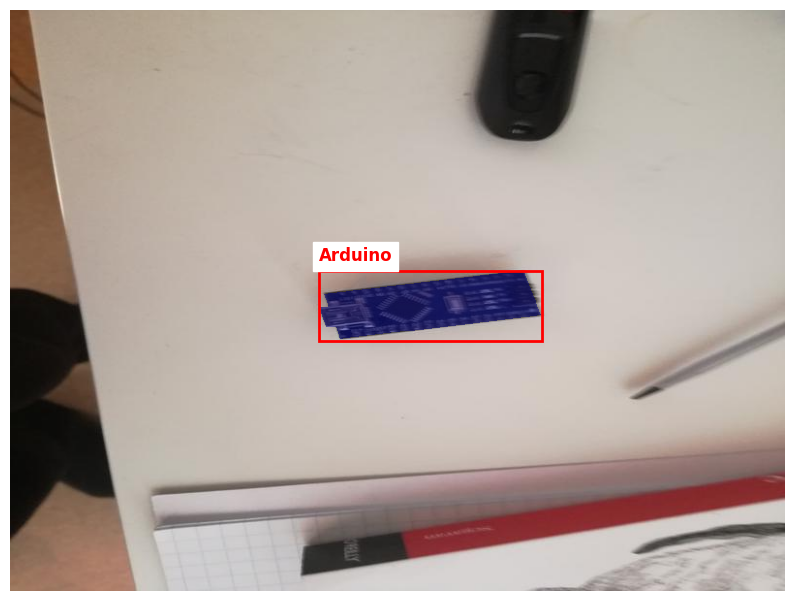

In [ ]:

def display_image_and_annotations(dataset, idx ,save_dir=None,save=False):
    coco = dataset.coco
    # Get the image and target from the dataset at index `idx`
    img, target = dataset[idx]

    if isinstance(img, torch.Tensor):
        img_np = img.permute(1, 2, 0).numpy()  # Convert [C, H, W] to [H, W, C]
    else:
        # If it's a PIL Image, convert to NumPy directly
        img_np = np.array(img)

    # Create a plot
    fig, ax = plt.subplots(1, figsize=(10, 10))

    # Display the image
    ax.imshow(img_np)

    # Get the bounding boxes (convert tensor to NumPy array)
    boxes = target["boxes"].numpy()

    # Get the labels (convert tensor to NumPy array)
    labels = target["labels"].numpy()

    # Add bounding boxes and class names to the plot
    for box, label in zip(boxes, labels):
        x1, y1, x2, y2 = box
        rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)

        # Get class name from COCO using the category ID (label)
        class_name = coco.cats[label]['name']

        # Add class name above the bounding box
        ax.text(x1, y1 - 10, class_name, color='red', fontsize=12, weight='bold', backgroundcolor='white')

    # Get the masks (ensure masks are tensors and convert to NumPy array)
    masks = target["masks"].numpy()

    # Overlay each mask on the image with transparency
    for mask in masks:
        ax.imshow(np.ma.masked_where(mask == 0, mask), cmap='jet', alpha=0.5)

    # Display the plot
    plt.axis('off')
    if save:
      if save_dir is None:
        save_dir = '/content/imagesAnnotated'
        if not os.path.exists(save_dir):
          os.makedirs(save_dir)
        plt.savefig(f'{save_dir}/side_by_side_comparison_{idx}.png')
      else:
        plt.savefig(f'{save_dir}/side_by_side_comparison_{idx}.png')
    plt.show()



# The COCO object is used to get the category names


#The following two lines create a directory in which we can save our annotated images in
!mkdir '/content/AnnotatedImages'
save_dir = '/content/AnnotatedImages'

#define how many images you would like to see with their anntoatations
images_to_print = 1

#Note we are not save the images as the variable is by default set to false
#I included being able to save them just from personal experience. Sometimes we are a dataset we didnt make ourselves.
#Being able to visualize before training is super important because if even some labels are off on only a few images
#our results can be undesirable and lead us down the wrong path, therefore this can a very good sanity check before training.
for idx in range(images_to_print):
  display_image_and_annotations(dataset, idx=idx,save_dir = save_dir)


The following libraries we are installing are custom libraries from pytorch. From here we can using their train_one_epoch and evaluate functions. These arent neccessary and one can either create their own or build upon theirs to create a custom one. The need to edit their or make a new one can be helpful if you would either like more control on how the model is training or would like to have access to more information from the evaluation phase.

In [ ]:

os.system("wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/engine.py")
os.system("wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/utils.py")
os.system("wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/coco_utils.py")
os.system("wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/coco_eval.py")
os.system("wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/transforms.py")

from engine import train_one_epoch, evaluate
import utils

For our data preproccessomg we will be using pytorches v2. This library has a varitey of possible transformations you can use and they recomend using v2 as it is faster and has more options.

Link To Documentation: https://pytorch.org/vision/main/transforms.html#v1-or-v2-which-one-should-i-use

In [ ]:
from torchvision.transforms import v2 as T

def get_transform(train):
    transforms = []
    if train:
        # transforms.append(T.RandomHorizontalFlip(.5))
        # transforms.append(T.RandomVerticalFlip(.5))
        # transforms.append(T.RandomRotation(180))
        transforms.append(T.Resize(420))
    transforms.append(T.ToDtype(torch.float, scale=True))
    transforms.append(T.ToPureTensor())
    return T.Compose(transforms)

This block will show us our data set class information. I also using a variable num_classes to have an easy way to access the number of classes for the rest of the notebook which makes things simpler. Its important to also remeber that Mask-RCNN like Faster-RCNN doesnt require a background class. If your dataset includes one then greate, but if it doesnt then just make sure to add a +1 to the num_classes variable.

In [ ]:

# Get all category IDs
category_ids = dataset.coco.getCatIds()

# Load all category information
categories = dataset.coco.loadCats(category_ids)

# Print the number of classes +1 for no background
num_classes = len(categories) +1
print(f"Number of classes: {num_classes}")

# Optionally, you can print the class names as well
class_names = [category['name'] for category in categories]
print("Class names:", class_names)


Number of classes: 5
Class names: ['Arduino', 'ESP8266', 'Heltec', 'Raspberry']


Our training loop will have a method to save the model as we train every time the accuracy increases. The following block creates a folder and save_dir variable to do this. Currently the model checkpoints are being saved locally in the content folder if you would like to save it to your drive so once the session is deleted you dont loose all that information, mount your drive and make sure to change the file paths.

In [ ]:
!mkdir /content/microcontroller-segmentation/epchs
save_dir = '/content/microcontroller-segmentation/epchs'

This line is just incase you need to restart the training loop. This clears the gpu cache. Although colab can be weird and sometimes this wont work therefore you still will have to restart the session. If you still get a out of memory error when trying to train even after restarting or on the first try, try reducing either batch size in the training cell or image size in the transformation function.

In [ ]:

torch.cuda.empty_cache()

The following function creates a new Mask-RCNN model by replacing the classification head with a new one to match the number of classes we need. If accuracy when training either plateus or just doesnt reach a satisfying point we can also change the amount of layers in each component of the model that are trainable. The documentation for the model states that for the backbone we can access the layers in blocks but neglects how to access the layers at an individual level and unless your familiar with how to access the layers within those sub-blocks chatgpt can come quite in handy.

Model Documentation: https://pytorch.org/vision/main/models/generated/torchvision.models.detection.maskrcnn_resnet50_fpn_v2.html#torchvision.models.detection.maskrcnn_resnet50_fpn_v2

In [ ]:


def get_model_instance_segmentation(num_classes):

    # load an instance segmentation model pre-trained on COCO
    #The default value for trainable backbone layers is already 3 but you can set it to 0 and uncomment the folling chunk of code to have finer control over this.
    model = torchvision.models.detection.maskrcnn_resnet50_fpn_v2(weights="DEFAULT",trainable_backbone_layers=3)


    # backbone = model.backbone
    # for layer in list(backbone.modules())[-120:]:
    #   for param in layer.parameters():
    #       param.requires_grad = True




    # get number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features

    # replace the pre-trained head with a new one
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    # now get the number of input features for the mask classifier
    in_features_mask = model.roi_heads.mask_predictor.conv5_mask.in_channels
    hidden_layer = 256
    # and replace the mask predictor with a new one
    model.roi_heads.mask_predictor = MaskRCNNPredictor(
        in_features_mask,
        hidden_layer,
        num_classes
    )


    return model

# Now we train

Training is fairly straight forward. Load your training dataset and validation dataset. In the training function I use SGD as the optimizer and Steplr as the learning rate scheduler. These typicaly have been what have been best for me and given the best results but it is also important to remember that this may not always be the case. Therefore here are the links to both optimizers and learning rate schedulars. Before exploring new optimizers and learning rate schedulars you should play around with the parameters first as sometimes its just about finding the right exact combination.

OPTIMIZERS: https://pytorch.org/docs/stable/optim.html

Learning Rate Schedulers: https://pytorch.org/docs/stable/optim.html

In [ ]:
# train on the GPU or on the CPU, if a GPU is not available
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# use our dataset and defined transformations
dataset = CocoDataset(imgs_dir='/content/microcontroller-segmentation/train2017', ann_file='/content/microcontroller-segmentation/annotations/instances_train2017.json',transforms=get_transform(train=True))
dataset_test = CocoDataset(imgs_dir='/content/microcontroller-segmentation/val2017', ann_file='/content/microcontroller-segmentation/annotations/instances_val2017.json',transforms=get_transform(train=False))


# define training and validation data loaders
data_loader = torch.utils.data.DataLoader(
    dataset,
    batch_size=8,
    shuffle=True,
    collate_fn=utils.collate_fn
)

data_loader_test = torch.utils.data.DataLoader(
    dataset_test,
    batch_size=1,
    shuffle=False,
    collate_fn=utils.collate_fn
)

# get the model using our helper function
model = get_model_instance_segmentation(num_classes)

# move model to the right device
model.to(device)

def Train(model,data_loader,data_loader_test,num_epochs=5,  early_stopping_patience = 10 ):
  # construct an optimizer
  params = [p for p in model.parameters() if p.requires_grad]
  optimizer = torch.optim.SGD(
      params,
      lr=0.005,
      momentum=0.9,
      weight_decay=0.0005
  )

  # and a learning rate scheduler
  lr_scheduler = torch.optim.lr_scheduler.StepLR(
      optimizer,
      step_size=20,
      gamma=0.1
  )



  result_mAP = []
  best_epoch = None

  early_stopping_patience = 3
  epochs_no_improvement = 0

  for epoch in range(num_epochs):
      # train for one epoch, printing every 10 iterations
      train_one_epoch(model, optimizer, data_loader, device, epoch, print_freq=10)
      # update the learning rate
      lr_scheduler.step()
      # evaluate on the test dataset
      results =  evaluate(model, data_loader_test, device=device)

      result_mAP.append(results.coco_eval['bbox'].stats[1])

      #save the best result so far
      if result_mAP[-1] == max(result_mAP):
          epochs_no_improvement = 0
          best_save_path = os.path.join(f'{save_dir}/MRCNN_bestmodel(wd=0)_8batch-epoch{epoch}.pth')
          torch.save(model.state_dict(), best_save_path)
          best_epoch = int(epoch)
          print(f'model from epoch number {epoch} saved!\n result is {max(result_mAP)}')
      else:
        epochs_no_improvement += 1
      if epochs_no_improvement >= early_stopping_patience:
            print(f"Early stopping triggered. No improvement in {early_stopping_patience} epochs.")
            print(f"Best epoch: {best_epoch}")
            print(f"Best mAP: {max(result_mAP)}")
            break

  print("That's it!")
  return best_epoch

best_epoch = Train(model,data_loader,data_loader_test)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_v2_coco-73cbd019.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_v2_coco-73cbd019.pth
100%|██████████| 177M/177M [00:01<00:00, 146MB/s]
/content/engine.py:30: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=scaler is not None):


Epoch: [0]  [ 0/18]  eta: 0:01:58  lr: 0.000299  loss: 2.9484 (2.9484)  loss_classifier: 1.5785 (1.5785)  loss_box_reg: 0.2129 (0.2129)  loss_mask: 1.1403 (1.1403)  loss_objectness: 0.0140 (0.0140)  loss_rpn_box_reg: 0.0027 (0.0027)  time: 6.5615  data: 0.9175  max mem: 13483
Epoch: [0]  [10/18]  eta: 0:00:31  lr: 0.003237  loss: 1.9698 (1.8891)  loss_classifier: 0.7994 (0.8430)  loss_box_reg: 0.1540 (0.1663)  loss_mask: 0.8737 (0.8550)  loss_objectness: 0.0215 (0.0221)  loss_rpn_box_reg: 0.0027 (0.0028)  time: 3.9804  data: 0.8363  max mem: 13655
Epoch: [0]  [17/18]  eta: 0:00:03  lr: 0.005000  loss: 0.8791 (1.4467)  loss_classifier: 0.2812 (0.6193)  loss_box_reg: 0.1555 (0.1676)  loss_mask: 0.5139 (0.6377)  loss_objectness: 0.0174 (0.0197)  loss_rpn_box_reg: 0.0024 (0.0024)  time: 3.8326  data: 0.7879  max mem: 13655
Epoch: [0] Total time: 0:01:08 (3.8330 s / it)
creating index...
index created!
Test:  [0/7]  eta: 0:00:01  model_time: 0.1708 (0.1708)  evaluator_time: 0.0143 (0.0143) 

In [ ]:
print(best_epoch)

0


This cell will load the checkpoint at which the model performed the best and run it on our test dataset. If you are running this cell after the epochs have been saved to your drive and youve disconnected from the session it was created just remember to change the file path where we load the model state.

In [ ]:

# use our dataset and defined transformations
dataset_test = CocoDataset(imgs_dir='/content/microcontroller-segmentation/val2017', ann_file='/content/microcontroller-segmentation/annotations/instances_val2017.json',transforms=get_transform(train=False))



data_loader_test = torch.utils.data.DataLoader(
    dataset_test, batch_size=1, shuffle=False, num_workers=2,
    collate_fn=utils.collate_fn)

# get the model using our helper function
model = get_model_instance_segmentation(num_classes)


# load model to evaluate
model.load_state_dict(torch.load(os.path.join(f'{save_dir}/MRCNN_bestmodel(wd=0)_8batch-epoch{best_epoch}.pth'),map_location=device))
model.to(device)

evaluate(model, data_loader_test, device=device)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


<ipython-input-16-e182aed96f20>:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(os.path.join(f'{save_dir}/MRCNN_bestmodel(wd=0)_8batch-epo

creating index...
index created!
Test:  [0/7]  eta: 0:00:04  model_time: 0.1939 (0.1939)  evaluator_time: 0.0110 (0.0110)  time: 0.5859  data: 0.3784  max mem: 13655
Test:  [6/7]  eta: 0:00:00  model_time: 0.1494 (0.1567)  evaluator_time: 0.0129 (0.0128)  time: 0.2336  data: 0.0612  max mem: 13655
Test: Total time: 0:00:01 (0.2447 s / it)
Averaged stats: model_time: 0.1494 (0.1567)  evaluator_time: 0.0129 (0.0128)
Accumulating evaluation results...
DONE (t=0.03s).
Accumulating evaluation results...
DONE (t=0.03s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.507
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.625
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.625
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.700
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxD

Now we can display the predictions from the model on our test dataset. In the example we are using a fairly small dataset and although evaluation seems to show good resuls we can see that there are still some classes in which the results arent amazing. To improve the results even further we can change the transformation function to apply augmentations to the dataset to prevent overfitting and improve generalization.

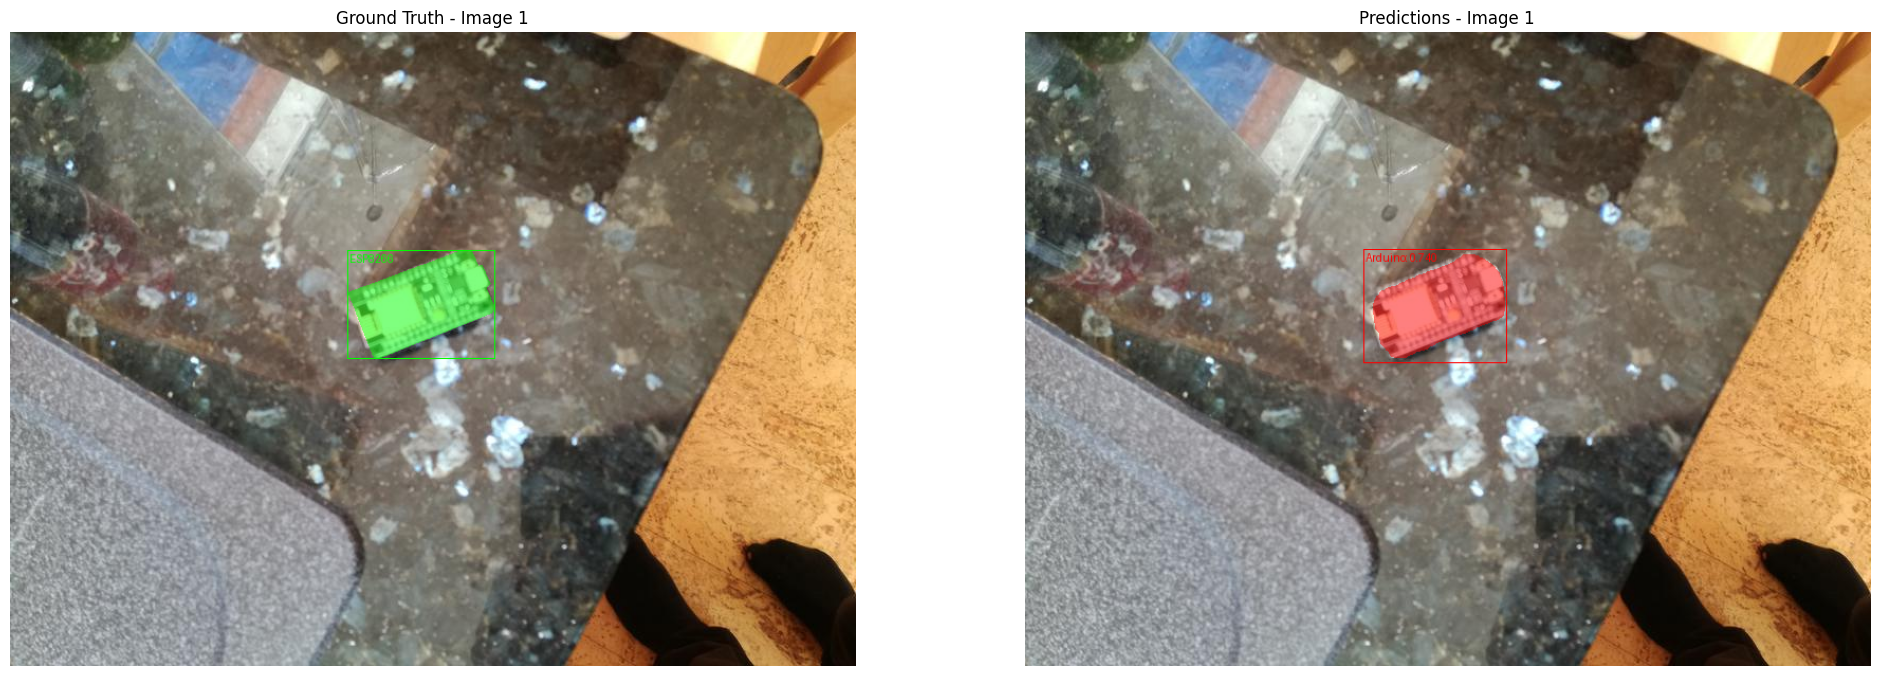

Processed image 1/7


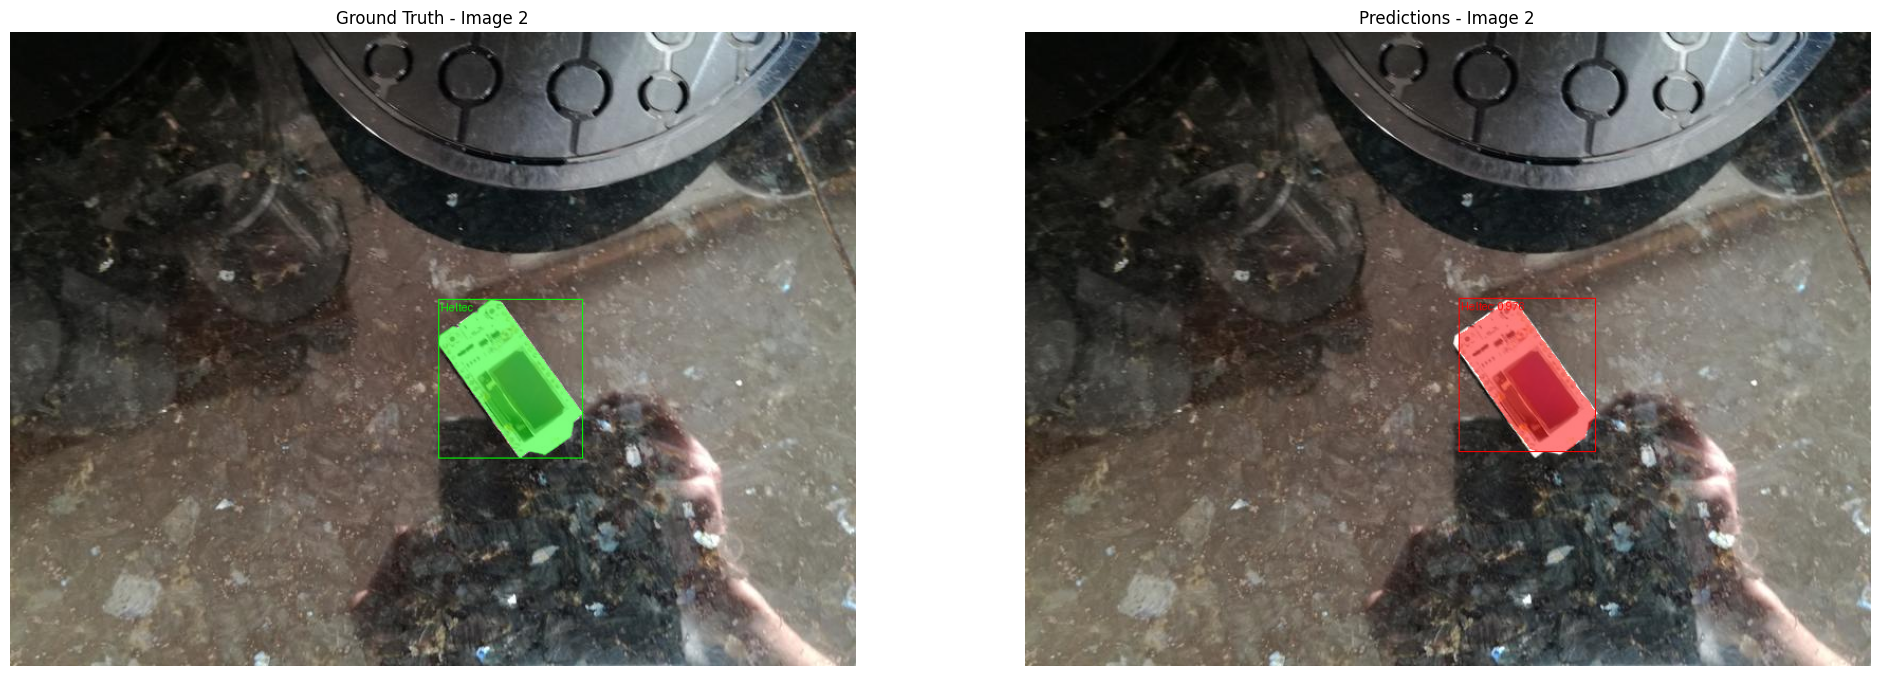

Processed image 2/7


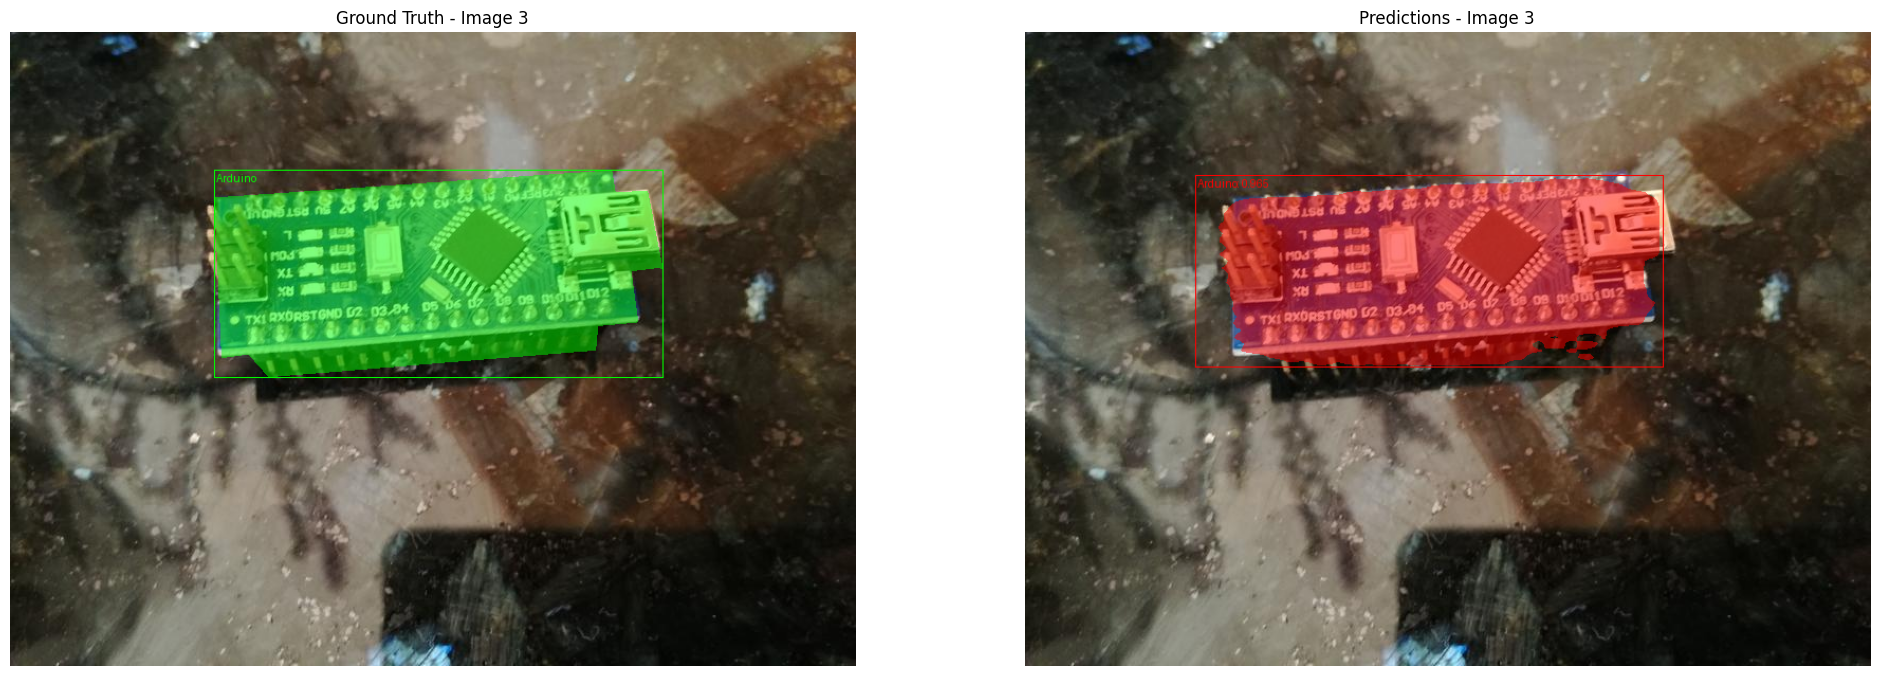

Processed image 3/7


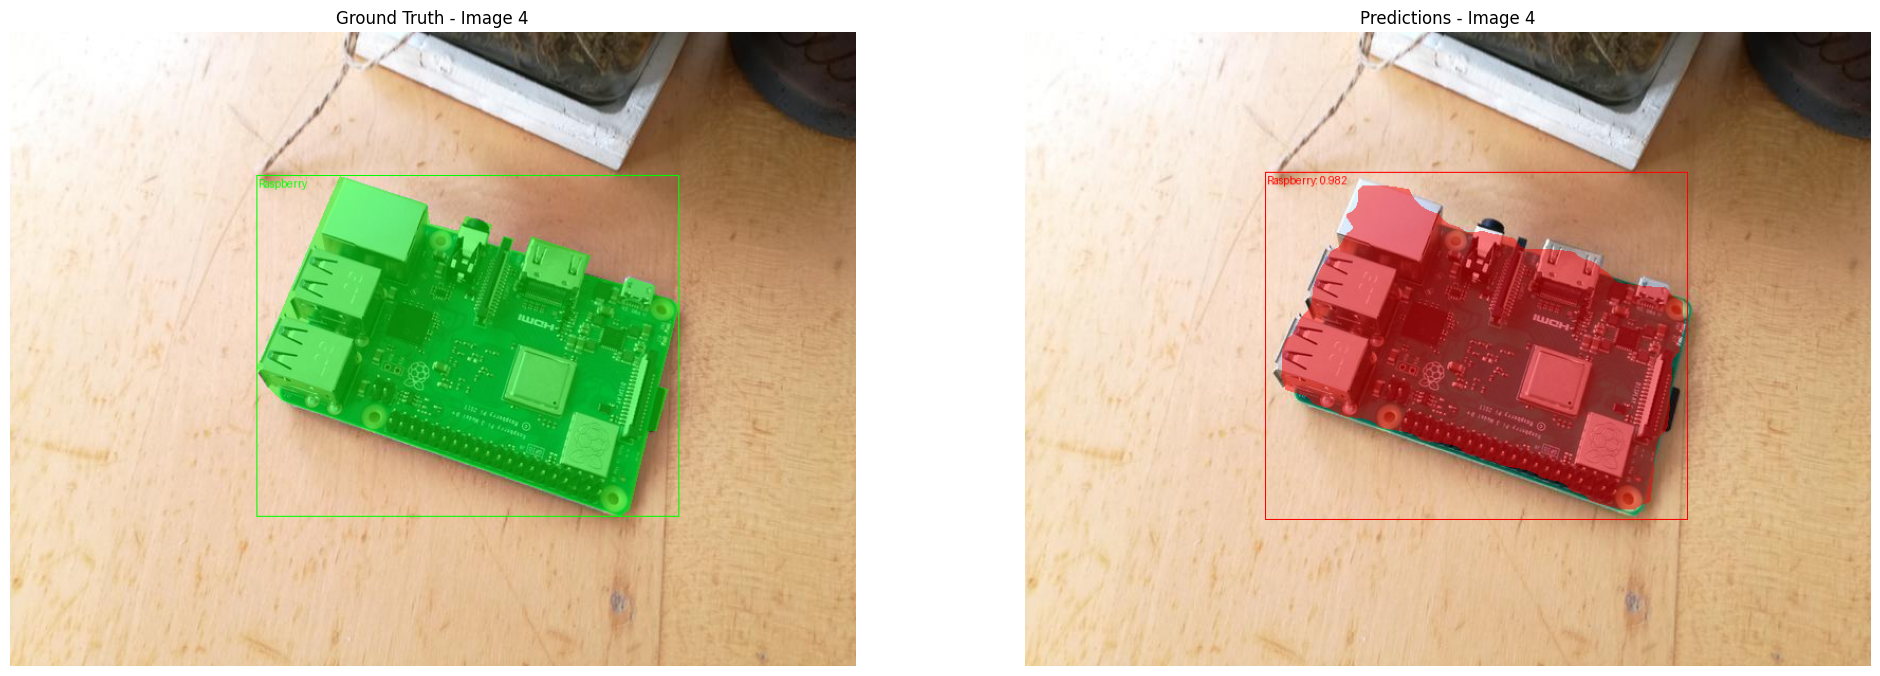

Processed image 4/7


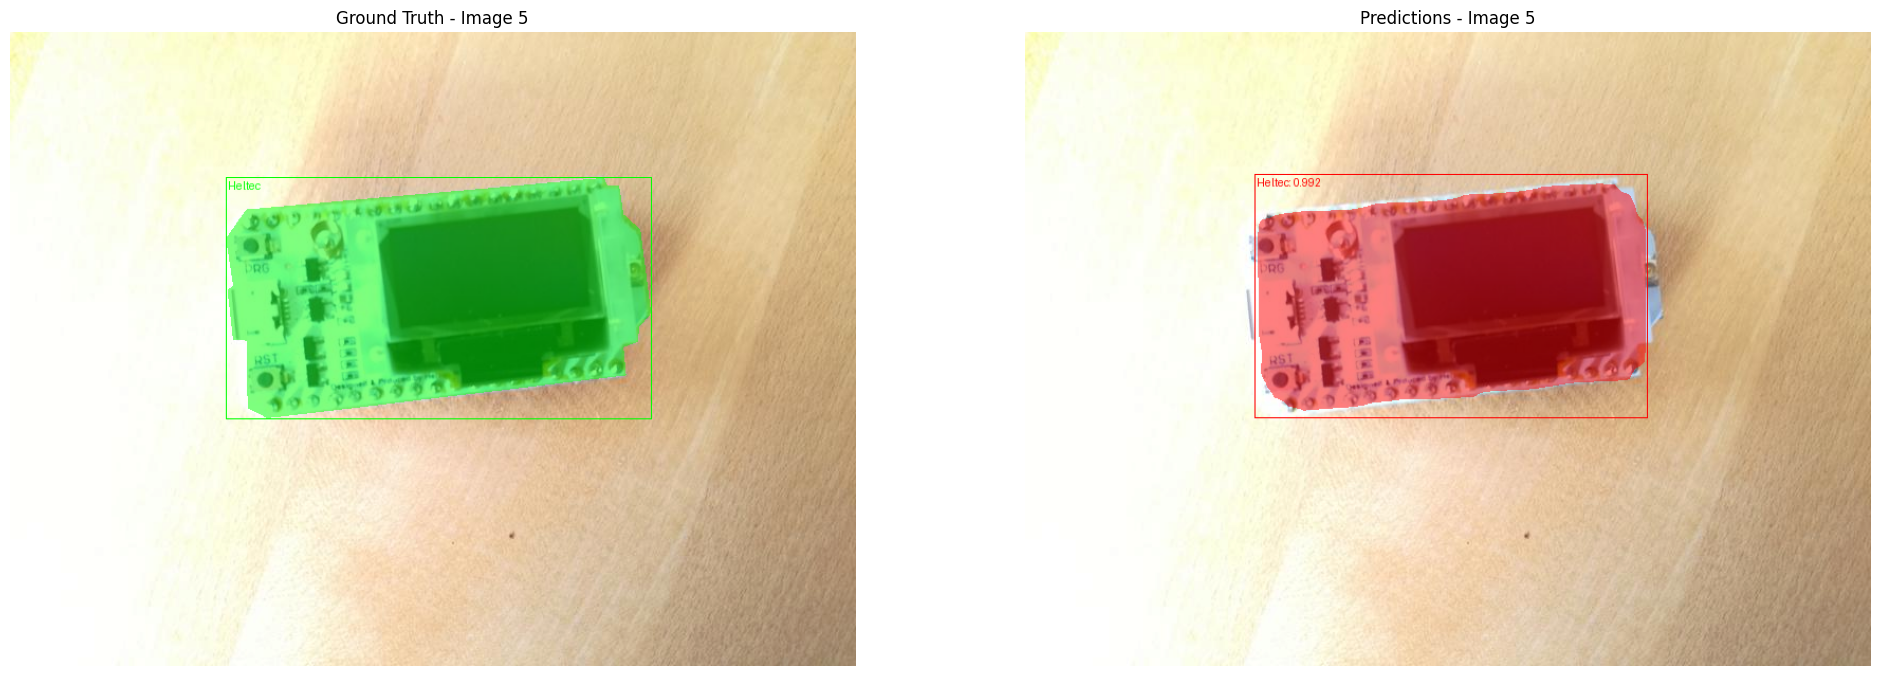

Processed image 5/7


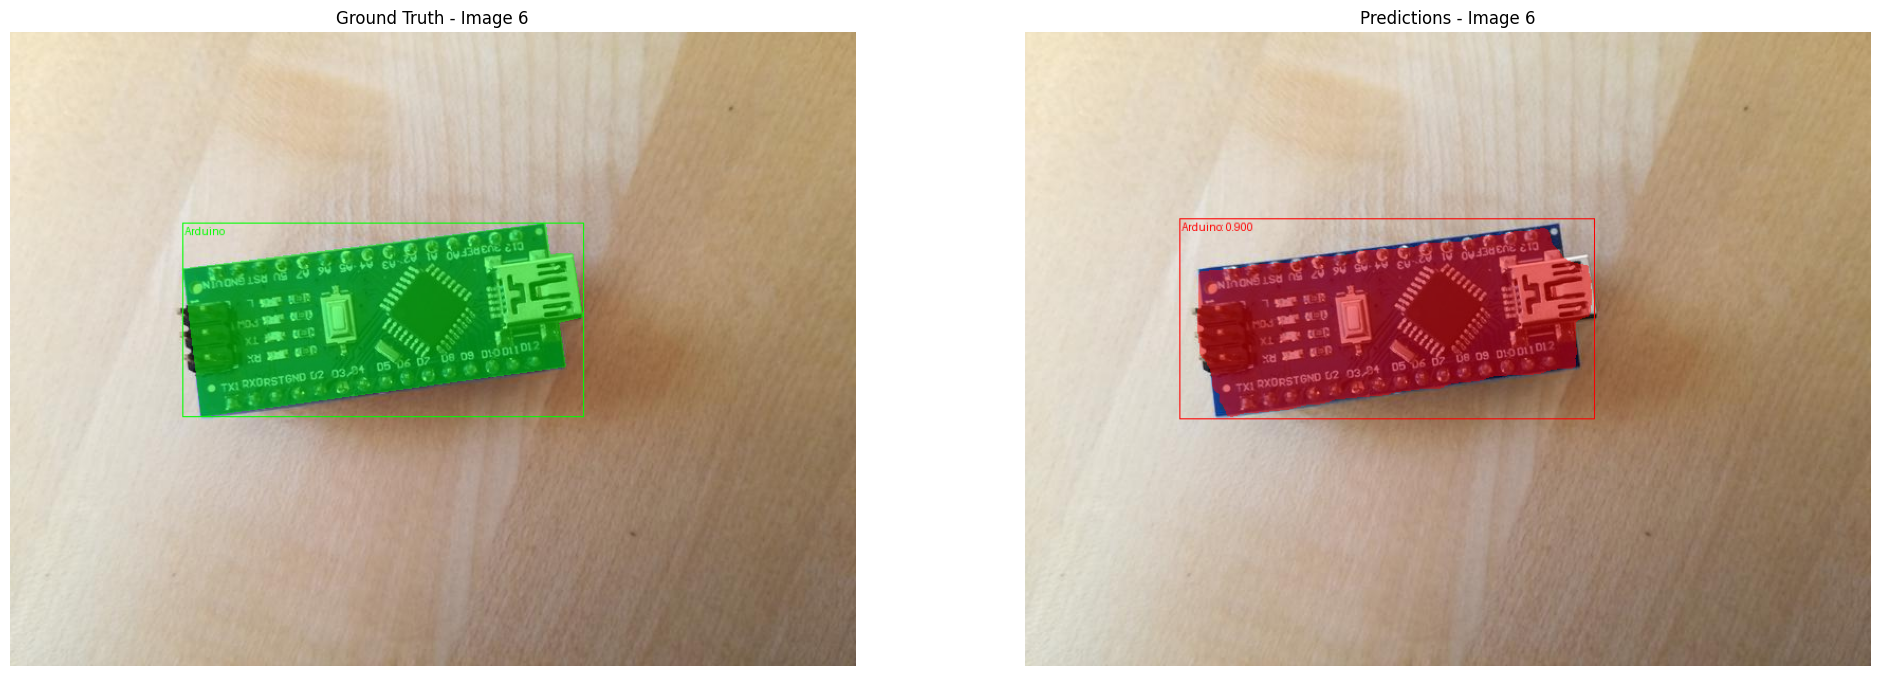

Processed image 6/7


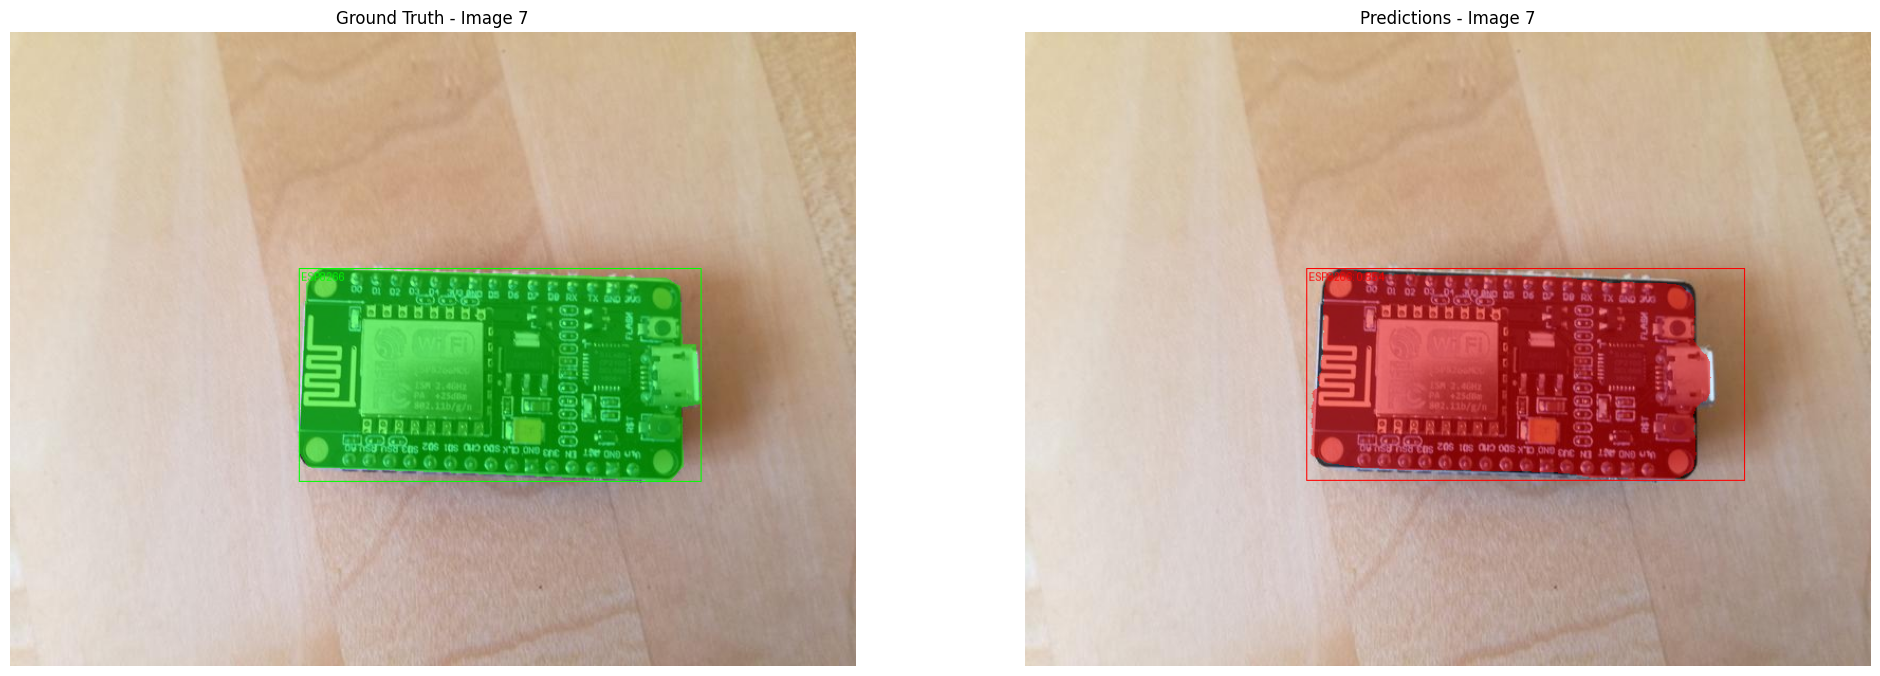

Processed image 7/7


In [ ]:
import matplotlib.pyplot as plt
from torchvision.utils import draw_bounding_boxes, draw_segmentation_masks
import torch

# Example class mapping from IDs to class names
class_mapping = {
    1: "Arduino",
    2: "ESP8266",
    3: "Heltec",
    4: "Raspberry"
}

# Loop through the dataset
model.eval()

def display_test_images_side_by_side(model, dataset_test, threshold=0.7):
    color_pred = (255, 0, 0)      # Red for prediction masks
    color_gt = (0, 255, 0)        # Green for ground truth masks
    detection_threshold = threshold

    for idx, data in enumerate(dataset_test):
        image, target = data

        # Prepare the image for model input
        with torch.no_grad():
            x = image.unsqueeze(0).to(device)  # Add batch dimension and move to device
            predictions = model(x)
            pred = predictions[0]

        # Normalize image for drawing
        original_image = (255.0 * (image - image.min()) / (image.max() - image.min())).to(torch.uint8)
        original_image = original_image[:3, ...]

        # Ground truth preparation
        gt_boxes = target["boxes"]
        gt_labels = target["labels"]
        gt_masks = target["masks"]

        gt_labels_text = [class_mapping[label.item()] for label in gt_labels]
        gt_colors = [(color_gt)] * len(gt_boxes)

        # Draw ground truth bounding boxes and masks
        gt_image = draw_bounding_boxes(original_image.clone(), gt_boxes.long(), labels=gt_labels_text, colors=gt_colors)
        gt_masks_binary = (gt_masks > 0.5).squeeze(1)
        gt_image = draw_segmentation_masks(gt_image, gt_masks_binary, alpha=0.5, colors=gt_colors)

        # Predictions preparation
        filtered_indices = pred["scores"] >= detection_threshold
        filtered_boxes = pred["boxes"][filtered_indices]
        filtered_labels = pred["labels"][filtered_indices]
        filtered_scores = pred["scores"][filtered_indices]
        filtered_masks = pred["masks"][filtered_indices]

        pred_labels = [f"{class_mapping[label.item()]}: {score:.3f}" for label, score in zip(filtered_labels, filtered_scores)]
        pred_colors = [color_pred] * len(filtered_boxes)

        # Draw predicted bounding boxes and masks
        pred_image = draw_bounding_boxes(original_image.clone(), filtered_boxes.long(), labels=pred_labels, colors=pred_colors)
        pred_masks_binary = (filtered_masks > 0.7).squeeze(1)
        pred_image = draw_segmentation_masks(pred_image, pred_masks_binary, alpha=0.5, colors=pred_colors)

        # Display side-by-side
        fig, ax = plt.subplots(1, 2, figsize=(24, 12))

        # Ground truth
        ax[0].imshow(gt_image.permute(1, 2, 0))
        ax[0].set_title(f"Ground Truth - Image {idx + 1}")
        ax[0].axis("off")

        # Predictions
        ax[1].imshow(pred_image.permute(1, 2, 0))
        ax[1].set_title(f"Predictions - Image {idx + 1}")
        ax[1].axis("off")

        plt.show()

        print(f"Processed image {idx + 1}/{len(dataset_test)}")

display_test_images_side_by_side(model, dataset_test)


# Now try training using this new dataset yourself

all the neccessary components have been split up into their own functions removing the need to re type everything out

In [ ]:
#This dataset stores the annotations in the same folder as the images at the end of the folder where the images are stored
#either way is fine the way they are stored makes no difference its just how roboflow exports their data
!gdown --no-check-certificate 'https://drive.google.com/uc?export=download&id=11yIrjX3165yvM4c9FfvPZqaSzv4ieuTs' -O dataset.zip
!unzip -qq dataset.zip